VULL FER UN HISTOGRAMA DE TOT EL DATASET PER VEURE QUINES CLASSES COMPENSAR

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd

In [5]:
nb_bins = 32
histograma = np.histogram(image, bins=nb_bins, range=[0, 31])

In [6]:
hist_np,bins = np.histogram(image.ravel(),12,[0,11], density=True)

<BarContainer object of 12 artists>

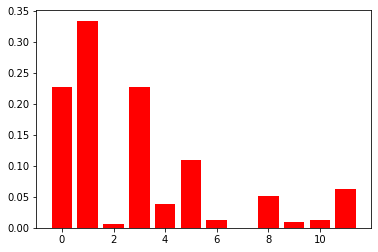

In [7]:
plt.bar(range(0,12) , hist_np, color='r')

In [4]:
classes = pd.read_csv('data/CamVid/class_dict.csv', index_col = 0)
class2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index} 

def rgb2mask(mask):
    semantic_map = []
    for colour in list(class2rgb.values()):        
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    semantic_map = np.argmax(semantic_map, axis=-1)

    return np.array(semantic_map)# convert one_hot to HxW

ValueError: shape mismatch: objects cannot be broadcast to a single shape

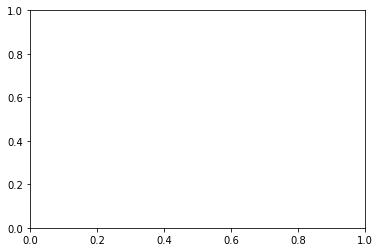

In [14]:
count = np.zeros(32)
root = 'data/CamVid/train_labels'

i = 0
for image in os.listdir(root): 
    i = i+1
    x = root + '/' + image
    if x.endswith('.png'):
        mask = cv2.imread(x)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        mask = rgb2mask(mask)

        hist, bins = np.histogram(mask.ravel(),32,[0,31], density=True)
        count += hist
        
count = count / i


plt.bar(range(0,32) , count)
plt.title("Train - Class histogram")

Text(0.5, 1.0, 'Train - Class histogram')

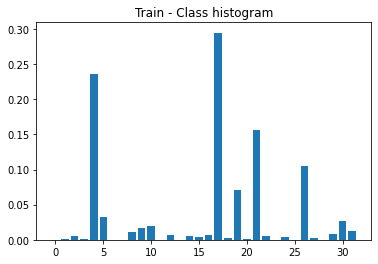

In [18]:
plt.bar(range(0,32) , count)
plt.title("Train - Class histogram")

In [19]:
class_weights = 1 / np.log(1.02 + count)
class_weights

array([50.37676985, 49.31400563, 40.6869888 , 49.4280702 ,  4.39475015,
       19.65531343, 49.83795652, 49.70221303, 33.07967799, 27.33550434,
       25.94484908, 50.21071836, 37.84765877, 50.35634767, 40.74921503,
       42.80685005, 38.38857375,  3.65530721, 44.91934535, 11.54580361,
       47.35963121,  6.16453288, 39.77155587, 50.39863981, 42.61361366,
       50.49834979,  8.52220088, 46.10246534, 50.49830932, 35.6327177 ,
       21.73201866, 31.0631698 ])

In [ ]:
class_weights = torch.FloatTensor([ 6.25928686,  2.7317735 , 25.55606533,  6.36818039,  8.61882934,
       24.73534571, 38.51992017, 50.49834979,  7.34372151, 34.67235386,
       50.49834979, 10.49458649]).cuda()

In [20]:
!module list

Currently Loaded Modulefiles:
 1) slurm/20.11   2) virtualgl/2.6  
>